### Importing All important Libraries

In [1]:
import pandas as pd
import time
import cv2 as cv
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

#### Applying HOG

In [41]:
hog_vectors = []
labels = []
datadir = "Image_Classification"

class_labels=['Cars','Ice cream cone','Cricket ball']
# Loop over each image in the directory
for i, class_label in enumerate(class_labels):
    for file in os.listdir(os.path.join(datadir, class_label)):
        if file.endswith(".jpg"):
            # Load the image
            img = cv.imread(os.path.join(datadir, class_label, file))
            img=cv.resize(img , (64, 128))
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            # Extract the hog features
            hog_features, hog_image = hog(gray, orientations= 9, pixels_per_cell = (8, 8), cells_per_block = (2, 2), block_norm='L2-Hys', visualize=True)

            hog_vectors.append(hog_features)
            labels.append(i)
          

#Convert list to np.array
hog_vectors = np.array(hog_vectors)

# Convert list feature to nparray
labels = np.array(labels)
df=pd.DataFrame(hog_vectors)
df['Target']=labels


#### Spliting data into x and y, applying feature Scaling

In [42]:

# lets seperate xtrain xtest ytrain ytest data
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# # for hog extractor
x_train , x_test, y_train, y_test=train_test_split(hog_vectors,labels, test_size=0.20)

#standarize the data
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Logistic Regression

C:\Users\safi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 1.250 seconds
Actual Values [2 2 2 0 1 0 1 2 2 0 0 2 1 0 1 2 0 1 0 0 2 0 2 2 2 0 2 0 2 2 1 0 2 0 0 2 2
 0 2 1 1 0 2 0 2 1 1 2 0 0 0 1 1 2 1 1 0 0 0 0 2 0 1 2 0 2 1 0 2 2 2 0 0 0
 1 1 1 1 2 0 1 2 1 2 1 0 0 1 1 1 2 2 0 2 1 2 2 1 2 0 1 1 0 0 2 0 1 2 2 0 2
 0 1 2 0 0 0 0 2 0 2 1 2 0 1 2 2 2 1 1 0 2 0 0 2 1 2 1 0 2 0 1 1 0 1 0 1 2
 0 2 1 0 1 2 0 2 0 0 2 0 2 1 0 2 1 2 2 0 0 1 1 2 0 1 0 1 0 2 1 0 0 2 0 2 1
 0 0 1 2 2 0 2 2]
Predicted Values [2 2 2 0 1 0 1 2 2 0 0 2 1 0 1 2 0 1 0 0 2 0 2 2 2 0 2 0 2 2 1 0 2 0 0 2 2
 0 2 1 1 0 2 0 2 1 1 2 0 0 0 1 1 2 1 1 0 0 0 0 2 0 1 2 0 2 1 0 2 2 2 0 0 0
 1 1 1 1 2 0 1 2 1 2 1 0 0 1 1 1 2 2 0 2 1 2 2 1 2 0 1 1 0 0 2 0 1 2 2 0 2
 0 1 2 0 0 0 0 2 0 2 1 2 0 1 2 2 2 1 1 0 2 2 0 2 1 2 1 0 2 0 1 1 0 1 0 1 2
 0 2 1 0 1 2 0 2 0 0 2 0 1 1 0 2 1 2 2 0 0 1 1 2 0 1 0 1 0 2 1 0 0 2 0 2 0
 0 0 1 2 2 0 2 2]
Accuracy for training of  :  1.0
Accuracy Test time in Logistic Regression :  0.9844559585492227
[[70  0  1]
 [ 1 52  0]
 [ 0  1 68]]


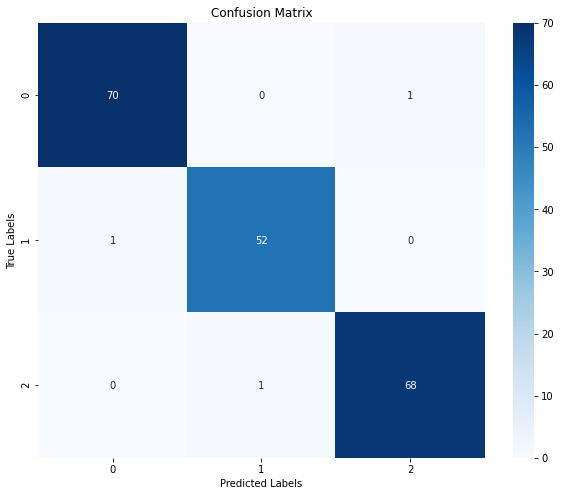

In [43]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()

start_time = time.time()    
classifier.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.3f} seconds".format(training_time))

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Actual Values', y_test)
print('Predicted Values', y_pred)

print('Accuracy for training of  : ', accuracy_score(y_train, y_train_pred))
print('Accuracy Test time in Logistic Regression : ', accuracy_score(y_test, y_pred) )

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

### Support Vector Machine

time complexity :0.972 
Traning Accuracy is :  1.0
Testing Accuracy is :  0.9792746113989638
[[70  0  1]
 [ 2 51  0]
 [ 1  0 68]]


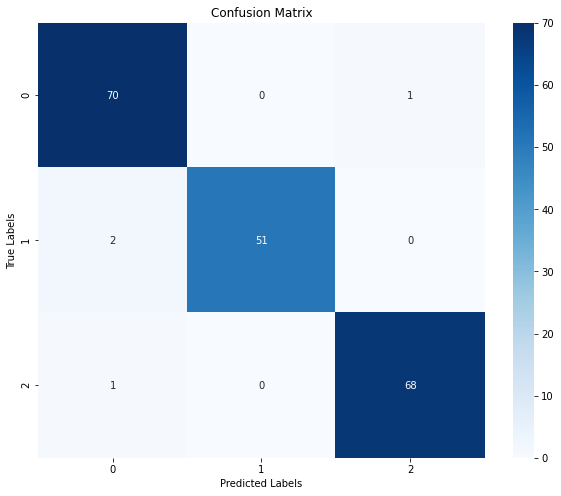

In [44]:
from sklearn.svm import SVC 

# Next we perform the step above of (data_Spliting and StandardScaler)

classifier = SVC(kernel = 'linear', random_state = 0)

start_time = time.time()
classifier.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Traning Accuracy is : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy is : ', accuracy_score(y_test, y_pred))

# Now we can also find the cofusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

### Decision Tree

time complexity :2.140 
Training State Accuracy :  1.0
Testing state Accuracy :  0.7564766839378239
[[52  9 10]
 [ 6 40  7]
 [ 7  8 54]]


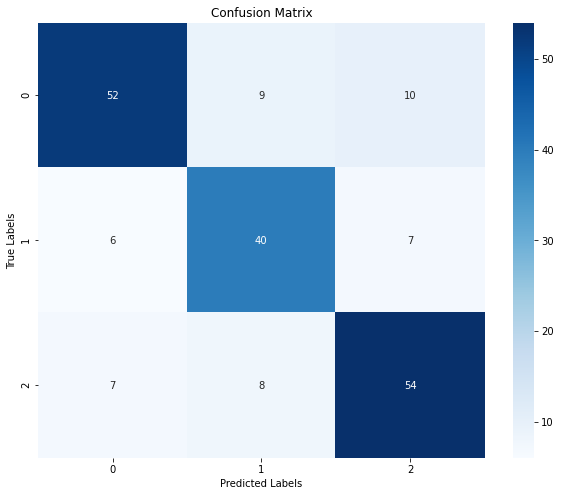

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini')

start_time = time.time()
tree.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_train_pred = tree.predict(x_train)
y_pred = tree.predict(x_test)

print("Training State Accuracy : ", accuracy_score(y_train, y_train_pred))
print('Testing state Accuracy : ', accuracy_score(y_pred, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

### Random Forest

time complexity :3.062 
Accuracy Rate during Training :  0.99609375
Accuracy Rate during Testing :  0.8601036269430051
[[66  1  4]
 [ 7 42  4]
 [ 8  3 58]]


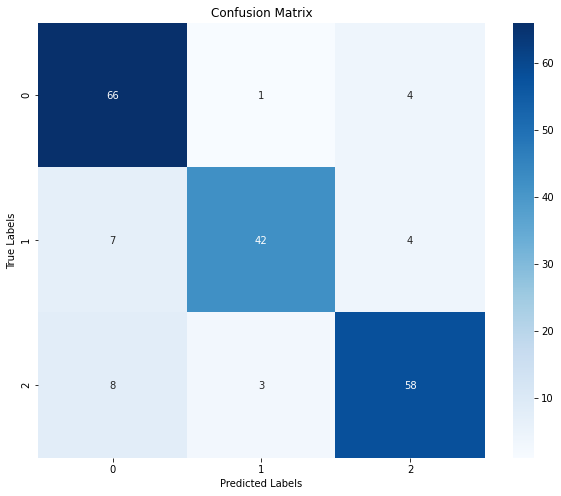

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10 ,criterion="entropy", random_state=0)

start_time=time.time()
forest.fit(x_train , y_train)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))
forest.score(x_train, y_train)

y_train_pred = forest.predict(x_train)
y_pred = forest.predict(x_test)

print("Accuracy Rate during Training : ",accuracy_score(y_train_pred, y_train))
print("Accuracy Rate during Testing : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()